<a href="https://colab.research.google.com/github/MhmudAlpurd/AnimationApp/blob/master/hwrs002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [15]:
import os, cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random as rnd
from tqdm import tqdm
import pickle as pkl
import PIL

**#path creation**


In [25]:
DIRECTORY = 'Hampalai/HWRS_0_0_2/'
CATEGORIES = ['plastics', 'metal' , 'paper' , 'glass']
IMAGE_SIZE = 150

In [26]:
img_tag_arr = []
images = []
tags = []

for category in tqdm(CATEGORIES):
    category_folder = os.path.join(DIRECTORY, category)
    img_label = CATEGORIES.index(category)
    for img in os.listdir(category_folder):
        image_path = os.path.join(category_folder, img)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_loaded = cv2.resize(image, (IMAGE_SIZE,IMAGE_SIZE))
        images.append(np.array(img_loaded))
        tags.append(img_label)
        img_tag_arr.append([np.array(img_loaded), int(img_label)])

print()
print('image_tags', len(img_tag_arr))
print('image_arr', len(images))
print('tags_arr', len(tags))

100%|██████████| 4/4 [00:10<00:00,  2.73s/it]


image_tags 1987
image_arr 1987
tags_arr 1987


**#split image and labels and convert lst to arr**

(1987, 150, 150, 3)
[[[0.72156863 0.76862745 0.80784314]
  [0.7372549  0.78039216 0.81960784]
  [0.73333333 0.78039216 0.81960784]
  ...
  [0.68235294 0.73333333 0.76470588]
  [0.68235294 0.73333333 0.76470588]
  [0.68235294 0.73333333 0.76470588]]

 [[0.7254902  0.77254902 0.81176471]
  [0.73333333 0.78039216 0.81960784]
  [0.73333333 0.78039216 0.81960784]
  ...
  [0.68235294 0.73333333 0.76470588]
  [0.68235294 0.73333333 0.76470588]
  [0.68235294 0.73333333 0.76470588]]

 [[0.72941176 0.77647059 0.81568627]
  [0.72941176 0.77647059 0.81568627]
  [0.73333333 0.78039216 0.81960784]
  ...
  [0.69019608 0.73333333 0.76470588]
  [0.69019608 0.73333333 0.76470588]
  [0.69019608 0.73333333 0.76470588]]

 ...

 [[0.65882353 0.71764706 0.72941176]
  [0.67058824 0.72941176 0.74117647]
  [0.66666667 0.7254902  0.7372549 ]
  ...
  [0.61176471 0.6627451  0.69411765]
  [0.61176471 0.6627451  0.69411765]
  [0.60392157 0.65490196 0.68627451]]

 [[0.65882353 0.71764706 0.72941176]
  [0.66666667 0.7

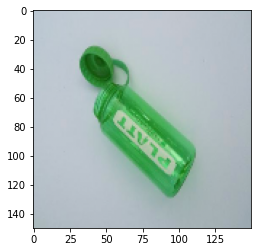

In [40]:
X = []
y = []

for img_tensor, labels in img_tag_arr:
    X.append(img_tensor) #X = image tensor
    y.append(labels) #y = label list

X = np.array(X) / 255
y = np.array(y)

#pkl.dump(X, open('X.pkl', 'wb'))
#pkl.dump(y, open('y.pkl', 'wb'))

#X = pkl.load(open('X.pkl', 'rb'))
#y = pkl.load(open('y.pkl', 'rb'))



print(X.shape)
print(X[0])
print(y[0])

#show the image (plastics: 0, metal: 1, paper: 2, glass:3)
plt.imshow(X[0])





In [10]:
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical

img_train, img_test, tag_train, tag_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('img_train:', len(img_train), type(img_train[0]), '| img_test:', len(img_test), '| lbl_train:', len(lbl_train), type(lbl_train[0]) , '| lbl_test:', len(lbl_test))

# convert the labels from integers to vectors
tag_train = to_categorical(lbl_train, num_classes=4)
tag_test = to_categorical(lbl_test, num_classes=4)


img_train: 1589 <class 'numpy.ndarray'> | img_test: 398 | lbl_train: 1589 <class 'numpy.int64'> | lbl_test: 398


**#ImageDataGenerator**

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=True,
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.1, zoom_range=0.2,
    channel_shift_range=0.2, fill_mode='nearest', cval=0.1, horizontal_flip=True,
    vertical_flip=True , rescale=True

)

datagen.fit(img_train)


**#model creation**

In [12]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy




num_classes = 4

myModel = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
myModel.summary()

myModel.compile(loss = 'binary_crossentropy', optimizer= optimizer_2, metrics=['accuracy'])
myModel.fit(x=datagen.flow(img_train, lbl_train, batch_size=32),validation_data=(img_test, lbl_test), steps_per_epoch=100,epochs=100, verbose=2)








Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [15]:
input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(input_layer)
pool1 = MaxPooling2D(pool_size = 2)(conv1)
conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size=2)(conv2)
flat = Flatten()(pool2)
out_layer = Dense(4, activation = 'softmax')(flat)
myModel = Model(input_layer, out_layer)
myModel.summary()

#------------------
base_model = VGG16(include_top= True, weights='imagenet', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))
input_layer = Input(base_model)

#input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(input_layer)
pool1 = MaxPooling2D(pool_size = 2)(conv1)
conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size=2)(conv2)
flat = Flatten()(pool2)
out_layer = Dense(4, activation = 'softmax')(flat)
myModel = Model(input_layer, out_layer)
myModel.summary()


#myModel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#myModel.compile(loss="binary_crossentropy", optimizer='Adam', metrics=["accuracy"])


myModel.fit(x=datagen.flow(img_train, lbl_train, batch_size=32),validation_data=(img_test, lbl_test), steps_per_epoch=len(img_train) // 32,epochs=3, verbose=1)
myModel.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 32)      18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [ ]:
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
optimizer_1 = SGD(lr=1e-4, momentum=0.99)
optimizer_2 = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer_1, metrics=['accuracy'])


EPOCHS = 100
BS = 32
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")
# train the network
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)
  

In [ ]:
#https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
#The Keras deep learning libraries to train model:
#1.fit
#2.fit_generator
#3.train_on_batch

EPOCHS = 100
BS = 128

trained_model = myModel.fit(X, y ,batch_size= BS, epochs= EPOCHS,verbose=2, validation_split= 0.2, validation_data =(img_test, lbl_test) , validation_steps = 100,steps_per_epoch=100, shuffle=True)

#history = myModel.fit(
   # image_gen.flow(img_train, lbl_train, batch_size=BS, shuffle= True),
   # validation_data =(img_test, lbl_test),
    #validation_steps = 100,
    #steps_per_epoch =  (len(img_train) // BS ),
   # epochs = EPOCHS,
    #verbose= 1)


**#Fitting**

In [ ]:
input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(input_layer)
pool1 = MaxPooling2D(pool_size = 2)(conv1)
conv2 = Conv2D(32, 3, activation = 'relu', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size=2)(conv2)
flat = Flatten()(pool2)
out_layer = Dense(4, activation = 'softmax')(flat)
myModel = Model(input_layer, out_layer)
myModel.summary()

**#Prediction**